In [26]:
from hossam import load_data
from pandas import crosstab

from matplotlib  import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb


In [27]:
my_dpi = 200                                    # 이미지 선명도(100~300)
font_path = "./NotoSansKR-Regular.ttf"          # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)               # 폰트의 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname=font_path)  # 폰트의 속성을 읽어옴
font_name = font_prop.get_name()                # 읽어온 속성에서 폰트의 이름만 추출     
plt.rcParams['font.family'] = font_name         # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 10                  # 기본 폰트크기
plt.rcParams['axes.unicode_minus'] = False      # 그래프에 마이너스 깨짐 방지(한글환경에서 필수)

In [28]:
origin = load_data('score')
origin

[data] https://data.hossam.kr/data/lab09/score.xlsx
[desc] 명목형 변수에 대한 탐색적 데이터 분석을 위한 샘플 데이터
[!] Cannot read metadata


,gender,score
0,M,A
1,M,C
2,M,B
3,M,B
4,W,A
5,W,C
6,W,C
7,W,B


In [29]:
df = origin.astype({'gender': 'category', 'score':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   gender  8 non-null      category
 1   score   8 non-null      category
dtypes: category(2)
memory usage: 404.0 bytes


In [30]:
df.describe(include='category')

,gender,score
count,8,8
unique,2,3
top,M,B
freq,4,3


In [31]:
for c in df.columns:
    print("==", c, "==")
    print(df[c].value_counts())

== gender ==
gender
M    4
W    4
Name: count, dtype: int64
== score ==
score
B    3
C    3
A    2
Name: count, dtype: int64


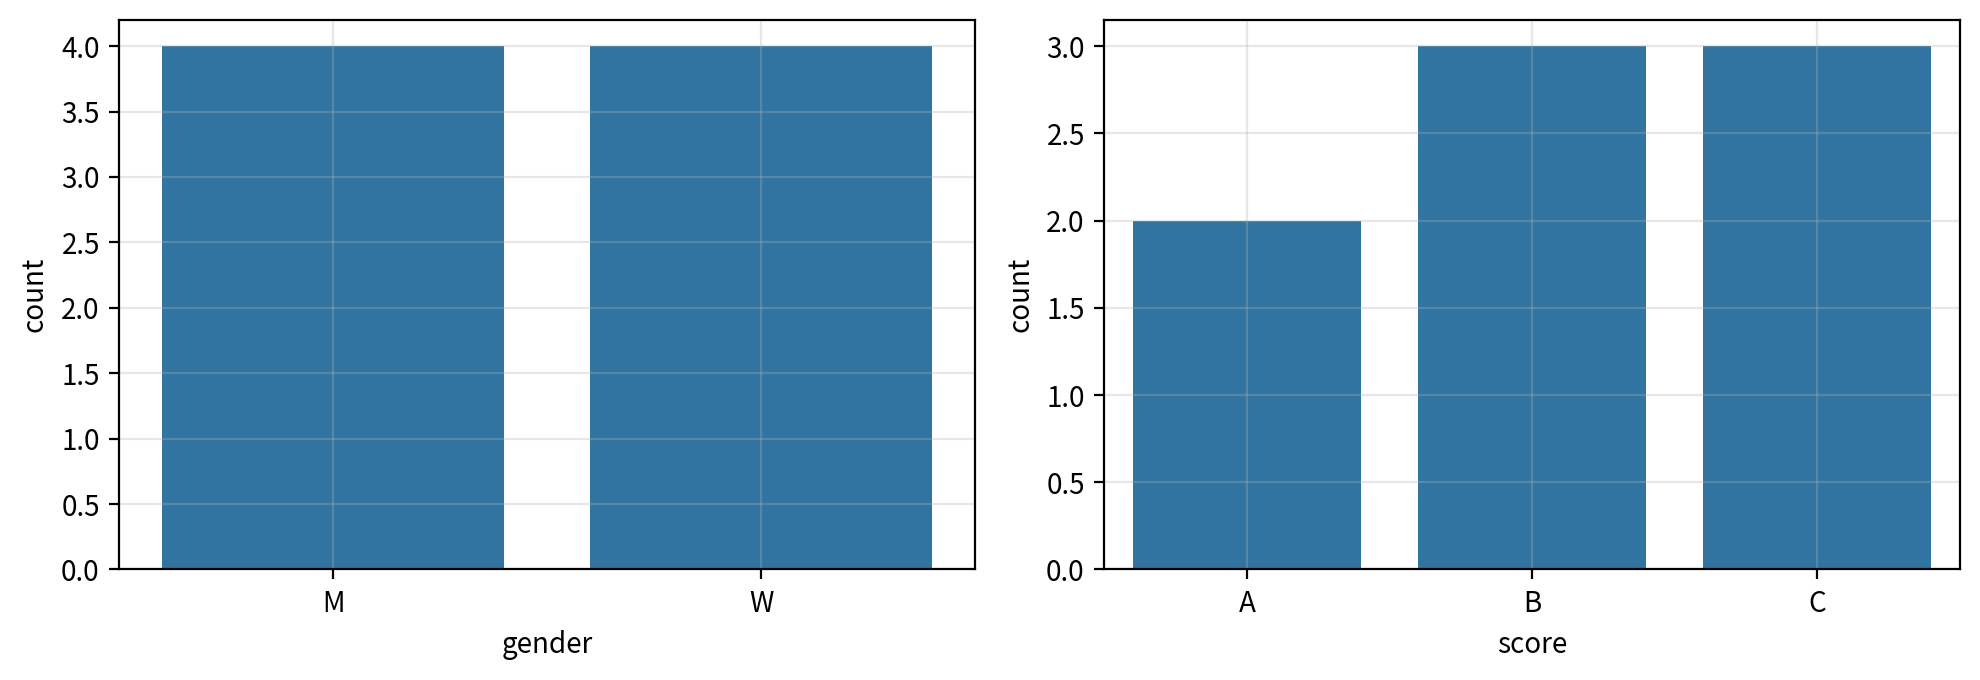

In [32]:
width_px = 2000
height_px = 700
rows = 1
cols = 2
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

for i, v in enumerate(df.columns):
    sb.countplot(data=df, x=v, ax=ax[i])
    ax[i].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()
plt.close()

In [33]:
cb1 = crosstab(index=df['gender'], columns=df['score'], rownames=['성별'], colnames=['점수'])
cb1

점수,A,B,C
성별,,,
M,1,2,1
W,1,1,2


In [34]:
cb2 = crosstab(index=origin['gender'], columns=origin['score'], rownames=['성별'], colnames=['점수'], margins=True, normalize=True)
cb2

점수,A,B,C,All
성별,,,,
M,0.125,0.250,0.125,0.5
W,0.125,0.125,0.250,0.5
All,0.250,0.375,0.375,1.0


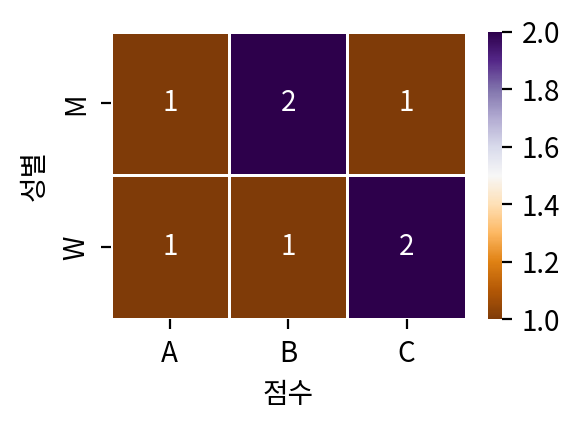

In [36]:
width_px = 600
height_px = 450
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.heatmap(data=cb1, annot=True, fmt="d", linewidth=0.5, cmap="PuOr")



plt.tight_layout()
plt.show()
plt.close()

인사이트

-남성은 B, 여성은 C점수가 상대적으로 많이 나타난다.
-A점수는 성별 차이가 없다.
-성별에 따라 점수 분포 패턴이 뚜렷하게 다르다.